# Feature Toxicity

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

Lets load the training data and have a look at it.

In [2]:
train = pd.read_csv('../input/train.csv')
train.iloc[:,1:].head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


### Part 1: Special characters and uppercase letters 

In [25]:
n_uppercase, n_special_char = [], []
for i, text in enumerate(train['comment_text']): 
    n_uppercase.append(len(re.findall(r'[A-Z]', text)))
    n_special_char.append(len(text) - len(re.findall('[ \w]', text)))
    
train.insert(loc=2, column='n_uppercase', value=n_uppercase)
train.insert(loc=3, column='n_special_char', value=n_special_char)

In [26]:
train[(train['toxic'] == 1)  |  (train['severe_toxic'] == 1)  |  (train['obscene'] == 1)  |  
      (train['threat'] == 1)  |  (train['insult'] == 1)  |  (train['identity_hate'] == 1)].iloc[:,1:].head(10)

,comment_text,n_uppercase,n_special_char,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,37,0,1,1,1,0,1,0
12,Hey... what is it..\n@ | talk .\nWhat is it......,43,28,1,0,0,0,0,0
16,"Bye! \n\nDon't look, come or think of comming ...",3,7,1,0,0,0,0,0
42,You are gay or antisemmitian? \n\nArchangel WH...,22,42,1,0,1,0,1,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",31,2,1,0,1,0,1,0
44,I'm Sorry \n\nI'm sorry I screwed around with ...,10,18,1,0,0,0,0,0
51,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,89,9,1,0,1,0,0,0
55,Stupid peace of shit stop deleting my stuff as...,1,1,1,1,1,0,1,0
56,=Tony Sidaway is obviously a fistfuckee. He lo...,3,3,1,0,1,0,1,0
58,My Band Page's deletion. You thought I was gon...,49,87,1,0,1,0,0,0


Hmm... no obvious correlation based on the 10 first rows in the training data. Lets have a look at the any of the rows labeled "toxic", "severe_toxic", "obscene", "threat", "insult" and/or "identity hate".

In [27]:
toxic_train = train[(train['toxic'] == 1)  |  (train['severe_toxic'] == 1)  |  (train['obscene'] == 1)  |  
                    (train['threat'] == 1)  |  (train['insult'] == 1)  |  (train['identity_hate'] == 1)]

toxic_train.iloc[:, 1:].head(10)

,comment_text,n_uppercase,n_special_char,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,37,0,1,1,1,0,1,0
12,Hey... what is it..\n@ | talk .\nWhat is it......,43,28,1,0,0,0,0,0
16,"Bye! \n\nDon't look, come or think of comming ...",3,7,1,0,0,0,0,0
42,You are gay or antisemmitian? \n\nArchangel WH...,22,42,1,0,1,0,1,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",31,2,1,0,1,0,1,0
44,I'm Sorry \n\nI'm sorry I screwed around with ...,10,18,1,0,0,0,0,0
51,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,89,9,1,0,1,0,0,0
55,Stupid peace of shit stop deleting my stuff as...,1,1,1,1,1,0,1,0
56,=Tony Sidaway is obviously a fistfuckee. He lo...,3,3,1,0,1,0,1,0
58,My Band Page's deletion. You thought I was gon...,49,87,1,0,1,0,0,0


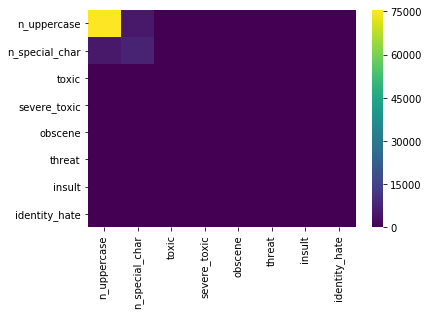

In [30]:
ax = sns.heatmap(toxic_train.cov(), cmap='viridis')
plt.show()

Could this be the case that the number of uppercase letters and special characters have negligable correlation with the toxicity in comments? 

Lets find out their correlation taking the length of the comment into consideration. 

In [7]:
del toxic_train

In [8]:
ratio_nuc, ratio_spchar = [], []
for i, text in enumerate(train['comment_text']): 
    sentence_len = len(text)
    ratio_nuc.append(n_uppercase[i] / sentence_len)
    ratio_spchar.append(n_special_char[i] / sentence_len)

train.insert(loc=4, column='ratio_nuc', value=ratio_nuc)
train.insert(loc=5, column='ratio_spchar', value=ratio_spchar)

train.iloc[:,1:].head(10)

,comment_text,n_uppercase,n_special_char,ratio_nuc,ratio_spchar,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,17,52,0.064394,0.196970,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,8,29,0.071429,0.258929,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",4,47,0.017167,0.201717,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",11,134,0.017685,0.215434,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",2,17,0.029851,0.253731,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",1,19,0.015385,0.292308,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,37,7,0.840909,0.159091,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,4,24,0.034783,0.208696,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,7,101,0.014831,0.213983,0,0,0,0,0,0
9,alignment on this subject and which are contra...,2,11,0.028571,0.157143,0,0,0,0,0,0


In [9]:
toxic_train = train[(train['toxic'] == 1)  |  (train['severe_toxic'] == 1)  |  (train['obscene'] == 1)  |  
                    (train['threat'] == 1)  |  (train['insult'] == 1)  |  (train['identity_hate'] == 1)]

toxic_train.iloc[:, 1:].head(5)

,comment_text,n_uppercase,n_special_char,ratio_nuc,ratio_spchar,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,37,7,0.840909,0.159091,1,1,1,0,1,0
12,Hey... what is it..\n@ | talk .\nWhat is it......,43,77,0.134796,0.241379,1,0,0,0,0,0
16,"Bye! \n\nDon't look, come or think of comming ...",3,16,0.052632,0.280702,1,0,0,0,0,0
42,You are gay or antisemmitian? \n\nArchangel WH...,22,152,0.033951,0.234568,1,0,1,0,1,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",31,9,0.775000,0.225000,1,0,1,0,1,0


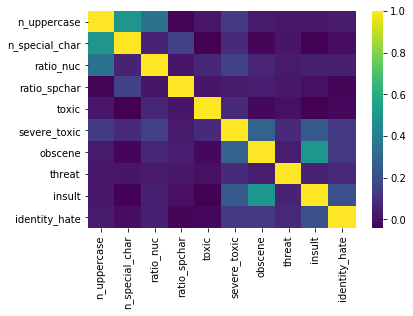

In [10]:
ax = sns.heatmap(toxic_train.corr(), cmap='viridis')
plt.show()

### Part 2: Common words

In [11]:
del train 
train = pd.read_csv('../input/train.csv')

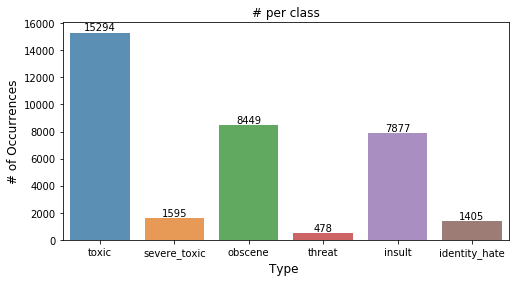

In [12]:
occurences = train.iloc[:, 2:].sum()

# Visualize with histogram
plt.figure(figsize=(8, 4))
ax = sns.barplot(occurences.index, occurences.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

# Text labels
rects = ax.patches
labels = occurences.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [18]:
n_clean = len(train) - np.sum(occurences)
print(n_clean)

124473


In [24]:
upsampling_factor_toxic = n_clean / occurences['toxic']
upsampling_factor_severe_toxic = n_clean / occurences['severe_toxic']
upsampling_factor_obscene = n_clean / occurences['obscene']
upsampling_factor_threat = n_clean / occurences['threat']
upsampling_factor_insult = n_clean / occurences['insult']
upsampling_factor_identity_hate = n_clean / occurences['identity_hate']

print('Toxic comments to be upsampled with a factor: {}'.format(upsampling_factor_toxic))
print('Severe toxic comments to be upsampled with a factor: {}'.format(upsampling_factor_severe_toxic))
print('Obscene comments to be upsampled with a factor: {}'.format(upsampling_factor_obscene))
print('Threat comments to be upsampled with a factor: {}'.format(upsampling_factor_threat))
print('Insult comments to be upsampled with a factor: {}'.format(upsampling_factor_insult))
print('Identity hate comments to be upsampled with a factor: {}'.format(upsampling_factor_identity_hate))

Toxic comments to be upsampled with a factor: 8.138681836014124
Severe toxic comments to be upsampled with a factor: 78.03949843260187
Obscene comments to be upsampled with a factor: 14.732276008995147
Threat comments to be upsampled with a factor: 260.4037656903766
Insult comments to be upsampled with a factor: 15.802082010917863
Identity hate comments to be upsampled with a factor: 88.59288256227758
